# 编程练习 1: 线性回归

## 1. 简单 Numpy 函数
生成一个 5 × 5 的单位矩阵

In [1]:
import numpy as np
A = np.eye(5) #生成单位矩阵
A

array([[1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1.]])

## 2. 一元线性回归

在本练习的这一部分中，您将使用一个变量实现线性回归，以预测食品卡车的利润。假设您是一家餐厅专营店的首席执行官，并正在考虑不同的城市开设新店。该连锁店已经在各种城市有卡车，你有来自城市的利润和人口的数据。

您想使用此数据来帮助您选择要扩展到下一个城市。文件 ex1data1.txt 包含线性回归问题的数据集。第一列是城市的人口，第二列是该城市食品卡车的利润。利润负值表示亏损。

### 2.1 绘制数据

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

path = "./data/ex1data1.txt"
data = pd.read_csv(path, header=None, names=['Population', 'Profit'])
data.head() # 返回数据的前 n行，默认为5

,Population,Profit
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


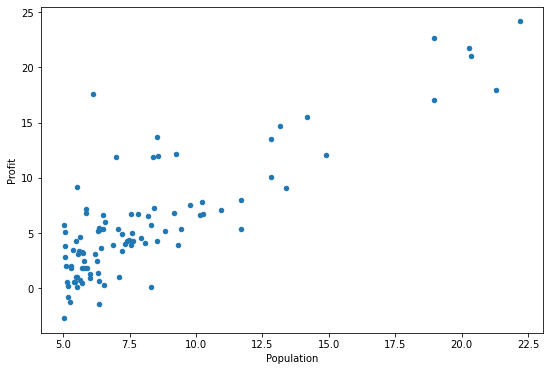

In [3]:
data.plot(kind='scatter', x='Population', y='Profit', figsize=(9,6))
plt.show()

### 2.2 梯度下降

在此部分中，您将使用梯度下降将线性回归参数 $\theta$ 拟合到我们的数据集中。

#### 2.2.1 更新公式

线性回归的目标是最小化代价函数

$$J\left( \theta  \right)=\frac{1}{2m}\sum\limits_{i=1}^{m}{{{\left( {{h}_{\theta }}\left( {{x}^{(i)}} \right)-{{y}^{(i)}} \right)}^{2}}}$$

其中假设 $ {{h}_{\theta}}\left( x \right) $ 由线性模型给出
$${{h}_{\theta}}\left( x \right) = {{\theta}^{T}}X = {{\theta}_0} + {{\theta}_1} x_1$$

回想一下，模型的参数是 $\theta_j$ 值。通过调整这些值以最小化代价 $J\left( \theta \right)$ 的值。实现最小化代价的一个方法就是使用批处理梯度下降算法。在批处理梯度下降中，每次迭代执行更新

$${{\theta }_{j}} := {{\theta }_{j}} - \alpha \frac{1}{m} \sum\limits_{i=1}^{m} \left( h_\theta  \left( x^\left( i \right) \right) - y^\left( i \right)  \right) x_j^\left(i\right)$$

随着梯度下降的每一步，您的参数 $\theta_j$ 更接近实现最低代价 $J\left(\theta\right)$ 的最佳值。

#### 2.2.2 实现

前面我们已经为线性回归设置了数据，下面为数据添加一个列以更新 $\theta_0$。并且将参数矩阵 $\theta$ 初始化为 0, 学习率 $\alpha$ = 0.01，迭代次数1500

In [4]:
data.insert(0, "Ones", 1) # 为矩阵 X 添加一列 1
theta = np.matrix([0,0]) # 初始化拟合参数

iterations = 1500

# 此时 X 为 m * 2 矩阵， theta.T 为 2 * 1 矩阵
alpha = 0.01

#### 2.2.3 计算代价 $J\left(\theta\right)$

pandas的DataFrame对象中，iloc用于矩阵切片（就像列表切片一样），其使用 `，` 来分割行和列; 

In [5]:
cols = data.shape[1]
X = data.iloc[:,:-1] # 所有行，第一列到倒数第一列
X.head() # 通过 h 函数计算 预测值

,Ones,Population
0,1,6.1101
1,1,5.5277
2,1,8.5186
3,1,7.0032
4,1,5.8598


In [6]:
y = data.iloc[:,cols-1:cols] # 所有行，最后一列
y.head() # 实际值

,Profit
0,17.5920
1,9.1302
2,13.6620
3,11.8540
4,6.8233


In [7]:
theta = np.matrix([0,0]) # 拟合参数初始为 0
theta

matrix([[0, 0]])

计算公式：$J\left( \theta  \right)=\frac{1}{2m}\sum\limits_{i=1}^{m}{{{\left( {{h}_{\theta }}\left( {{x}^{(i)}} \right)-{{y}^{(i)}} \right)}^{2}}}$ ， 其中 ${{h}_{\theta}}\left( x \right) = {{\theta}^{T}}X = {{\theta}_0} + {{\theta}_1} x_1$；

由于形成的矩阵维度不同，实际计算公式为  ${{h}_{\theta}}\left( x \right) = X\theta^T = {{\theta}_0} + {{\theta}_1} x_1$；

In [8]:
# 2.2.1 中公式
def computeCost(X, y, theta):
    inner = np.power(((X * theta.T) - y), 2)
    return np.sum(inner) / (2 * X.shape[0])

# 此时 X 为 m * 2 矩阵， theta.T 为 2 * 1 矩阵

In [9]:
# 转换为 numpy 矩阵，更方便矩阵乘法
X = np.matrix(X.values)
y = np.matrix(y.values)

computeCost(X, y, theta)

32.072733877455676

代价函数拟合参数 $\theta$ 初始为 0, 故 代价为 32.07

#### 2.2.4 梯度下降

在编程时，需理解要优化的内容和更新的内容。记住 $J\left( \theta \right)$ 的变量是向量 $\theta$, 而不是 $X$ 和 $y$。也就是说通过改变向量 $\theta$ 的值来最小化 $J\left( \theta \right)$，而不是改变 $X$ 和 $y$ （$X$ 为人数矩阵、$y$ 为获利矩阵）。

一个检验梯度下降正常运作的方式是查看 $J\left( \theta \right)$ 的值并检查每一步是否减小。如果实现了正确的梯度下降算法和代价计算，$J\left( \theta \right)$ 的值就永远不会增加，并且最终会收敛到一个稳定的值。

完成梯度下降以后，使用最终的参数来绘制线性拟合函数。

最终的 $\theta$ 值将会用来预测在 $35,000$ 和 $70,000$ 人口地区的盈利。

回顾一下公式：

代价函数：$J\left( \theta  \right)=\frac{1}{2m}\sum\limits_{i=1}^{m}{{{\left( {{h}_{\theta }}\left( {{x}^{(i)}} \right)-{{y}^{(i)}} \right)}^{2}}}$ ， 其中 ${h_\theta\left( x \right)} = {\theta^T}X = {\theta_0} + {{\theta_1} x_1} + {{\theta_2} x_2} + \ldots + {{\theta_n} x_n}$；

梯度下降：repeat {
    $\theta_j := \theta_j - \alpha \frac{\partial}{\partial\theta_j} J\left( \theta \right)$ ,同时更新 $\theta_j, (j = 0,1,\ldots,n)$
}

对 $J\left( \theta \right)$ 求偏导即，$\theta_j := \theta_j - \alpha \frac{1}{m} \sum\limits_{i=1}^{m}\left( {h_\theta\left(x^{\left(i\right)}\right)} - {y^\left(i\right)} \right) x_j^\left(i\right) $;

计算时使用向量同时更新所有 $\theta$

In [10]:
def gradientDescent(X, y, theta, alpha, iters):
    tmp = np.matrix(np.zeros(theta.shape)) #初始化 θ 临时矩阵，用于同时更新
    params = int(theta.ravel().shape[1]) #向量 θ 中的参数个数
    cost = np.zeros(iters) #记录每次迭代的代价
    m = X.shape[0]

    for i in range(iters):
        error = (X * theta.T) - y

        for j in range(params): #计算每个参数
            term = np.multiply(error, X[:,j]) # multiply 为矩阵对应相乘
            tmp[0,j] = theta[0,j] - ((alpha / m) * np.sum(term))
            
        theta = tmp #同时更新
        cost[i] = computeCost(X, y, theta)
        
    return theta, cost

执行梯度下降算法来使参数 $\theta$ 拟合数据集，学习率 $\alpha = 0.01$, 迭代次数 1500 次 

In [11]:
alpha = 0.01
iters = 1500

g, cost = gradientDescent(X, y, theta, alpha, iters)
g

matrix([[-3.63029144,  1.16636235]])

使用已经训练的 $\theta$ 来预测在 35,000 和 70,000 人口地区的盈利：
${{h}_{\theta}}\left( x \right) = X\theta^T = {{\theta}_0} + {{\theta}_1} x_1$；

In [12]:
predict1 = np.mat([1, 3.5]) * g.T
print("predict1: ", predict1)

predict2 = np.mat([1, 7]) * g.T
print("predict2: ", predict2)

predict1:  [[0.45197679]]
predict2:  [[4.53424501]]


### 2.4 可视化 $J\left( \theta \right)$

- 数据集及拟合的线性函数

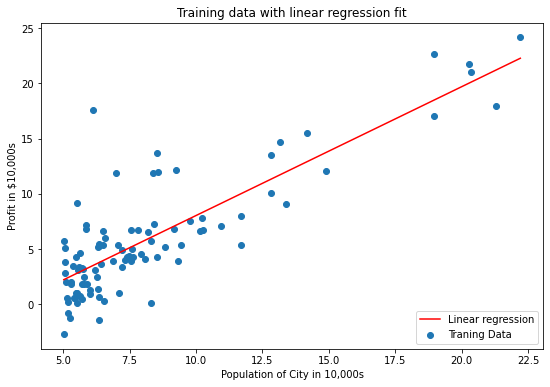

In [13]:
x = np.linspace(data.Population.min(), data.Population.max(), 100)
f = g[0, 0] + (g[0, 1] * x)

fig, ax = plt.subplots(figsize=(9,6))
ax.scatter(data.Population, data.Profit, label='Traning Data')
ax.plot(x, f, 'r', label='Linear regression')
ax.legend(loc=4)
ax.set_xlabel('Population of City in 10,000s')
ax.set_ylabel('Profit in $10,000s')
ax.set_title('Training data with linear regression fit')
plt.show()

- 迭代中的代价

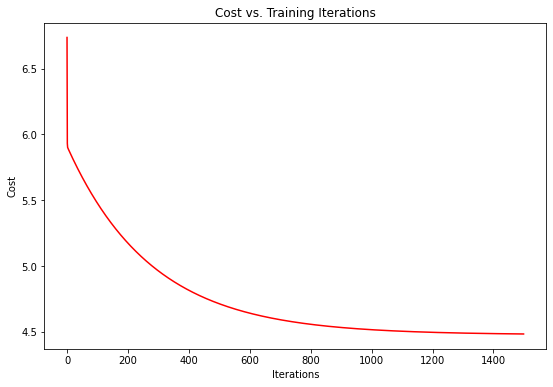

In [14]:
fig, ax = plt.subplots(figsize=(9,6))
ax.plot(np.arange(iters), cost, 'r')  # np.arange()返回等差数组
ax.set_xlabel('Iterations')
ax.set_ylabel('Cost')
ax.set_title('Cost vs. Training Iterations')
plt.show()

- 代价函数 $J\left( \theta \right)$

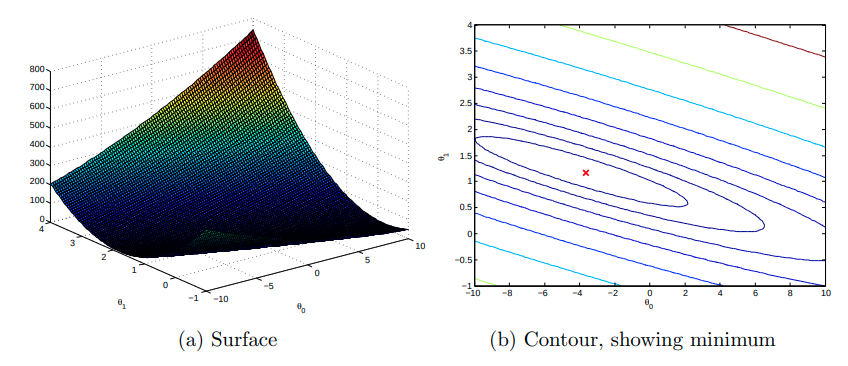

## 3. 多元线性回归

在这一部分，通过多变量实现线性回归来预测房屋价格。如果你正在出售房屋，并且想知道一个好的市场价格。一种方法就是收集最近房屋出售的信息，并建立房屋价格模型。

在ex1data2.txt中包含一组房屋价格数据集，第一列是房屋的大小（以平方英尺为单位），第二列是卧室的数量，第三列是房屋的价格。

In [15]:
path = './data/ex1data2.txt'
data = pd.read_csv(path, header=None, names=['Size', 'Bedrooms', 'Price'])
data.head()

,Size,Bedrooms,Price
0,2104,3,399900
1,1600,3,329900
2,2400,3,369000
3,1416,2,232000
4,3000,4,539900


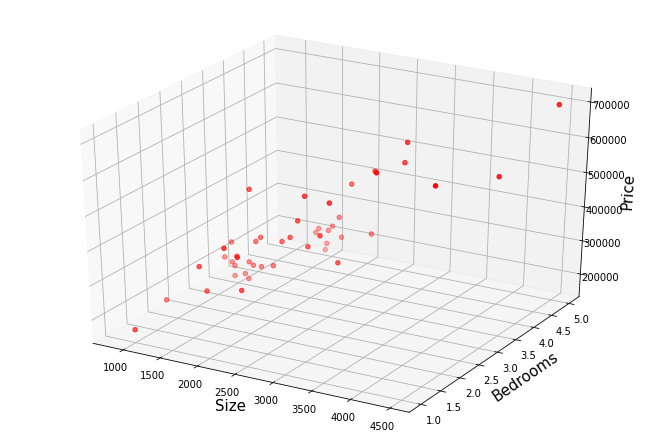

In [16]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(9,6))
ax = Axes3D(fig)
ax.scatter(data.iloc[:,0], data.iloc[:,1], data.iloc[:,2], c='r')  
ax.set_xlabel('Size',fontdict={"size":15})
ax.set_ylabel('Bedrooms',fontdict={"size":15})
ax.set_zlabel('Price',fontdict={"size":15})
plt.show()

### 3.1 特征归一化

通过观察这些数据值，房屋的大小值是卧室数量值的1000倍，当特征相差一个数量级时，首先执行特征缩放可以使梯度下降收敛的更快

- 从数据集中减去每个要素的平均值。
- 减去平均值后，再将特征值除以它们各自的“标准偏差”。

In [17]:
print(data.mean()) # 均值
print(data.std()) # 标准差
data = (data - data.mean()) / data.std()
data.head()

Size          2000.680851
Bedrooms         3.170213
Price       340412.659574
dtype: float64
Size           794.702354
Bedrooms         0.760982
Price       125039.899586
dtype: float64


,Size,Bedrooms,Price
0,0.130010,-0.223675,0.475747
1,-0.504190,-0.223675,-0.084074
2,0.502476,-0.223675,0.228626
3,-0.735723,-1.537767,-0.867025
4,1.257476,1.090417,1.595389


### 3.2 梯度下降

前面已经在单变量回归问题上实现了梯度下降，现在唯一的不同就是矩阵 $X$ 中多了一个特征。假设函数和批量梯度下降更新规则不变。

In [18]:
data.insert(0, "Ones", 1)
data.head()

,Ones,Size,Bedrooms,Price
0,1,0.130010,-0.223675,0.475747
1,1,-0.504190,-0.223675,-0.084074
2,1,0.502476,-0.223675,0.228626
3,1,-0.735723,-1.537767,-0.867025
4,1,1.257476,1.090417,1.595389


In [19]:
cols = data.shape[1]
X = data.iloc[:,:cols - 1]
y = data.iloc[:,cols - 1:]
X = np.mat(X.values)
print(X.shape)
y = np.mat(y.values)
print(y.shape)
theta = np.mat(np.zeros(X.shape[1]))

g, cost = gradientDescent(X, y, theta, alpha, iters)
g

(47, 3)
(47, 1)


matrix([[-1.10898288e-16,  8.84042349e-01, -5.24551809e-02]])

- 迭代中的代价

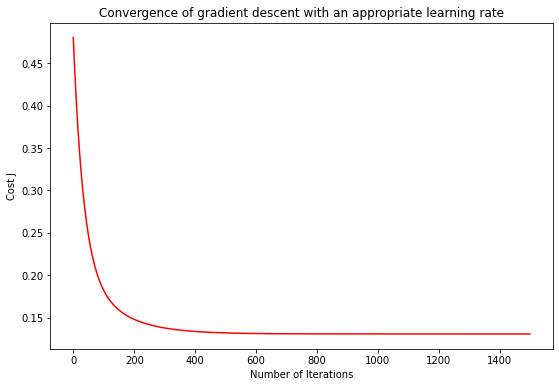

In [20]:
fig, ax = plt.subplots(figsize=(9,6))
ax.plot(np.arange(iters), cost, 'r')  # np.arange()返回等差数组
ax.set_xlabel('Number of Iterations')
ax.set_ylabel('Cost J')
ax.set_title('Convergence of gradient descent with an appropriate learning rate')
plt.show()

#### 3.2.1 选择学习率

这部分了练习，尝试选择不同的学习率来找到一个快速收敛的学习率。

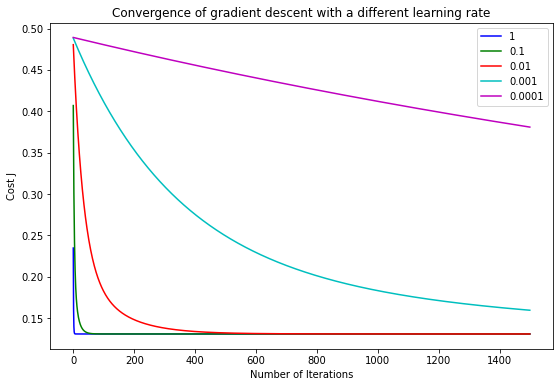

In [21]:
fig, ax = plt.subplots(figsize=(9,6))

for t in [(1, 'b'), (0.1, 'g'), (0.01, 'r'), (0.001, 'c'), (0.0001, 'm')]:
    _, cost = gradientDescent(X, y, theta, t[0], iters)
    ax.plot(np.arange(iters), cost, t[1], label=t[0]) 
    
ax.legend(loc=1)
ax.set_xlabel('Number of Iterations')
ax.set_ylabel('Cost J')
ax.set_title('Convergence of gradient descent with a different learning rate')
plt.show()

从上图可以清晰的对比出不同的学习率的收敛效果，0.01 就是一个很不错的学习率。

下面使用已经训练的 θ 和 α 来预测占地1650平方英尺，拥有3个卧室的房屋售价

In [22]:
predict = np.mat([1, 1650, 3]) * g.T
print("predict: ", predict)

predict:  [[1458.51251027]]


### 3.3 正规方程

线性回归的另一个解法是 $$\theta = {\left( X^TX \right)}^{-1} X^T {\vec y}$$
使用这个公式不需要任何的特征缩放，且能通过一次计算得到确切的结果：像是一个没有 *“循环直到收敛”* 的梯度下降

对比：
m 个训练数据，n 个特征
 
梯度下降：
- 需要选择学习率 $\alpha$
- 需要多次迭代
- 即使特征数量 n 很大也能适用

正规方程：
- 不需要选择学习率 $\alpha$
- 不需要迭代
- 需要计算 $X^TX$ （时间复杂度$O\left( n^3 \right)$），故当 n 很大时会很慢
- 只适用于线性模型

In [23]:
def normalEquation(X: np.matrix, y: np.matrix):
    return (X.T * X).I * X.T * y

normalEquation(X, y)

matrix([[-1.11022302e-16],
        [ 8.84765988e-01],
        [-5.31788197e-02]])

梯度下降的结果是: `matrix([[-1.10898288e-16,  8.84042349e-01, -5.24551809e-02]])`